# xG Model

In [92]:
from statsbombpy import sb
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns
import json
import numpy as np
import pandas as pd
import networkx as nx
import math
import matplotlib.pyplot as plt

from mplsoccer import Pitch, VerticalPitch, Standardizer, FontManager

In [93]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [2]:
with open(r'C:\Users\34626\OneDrive\Documents\Jaume\Big Data\Football\events/events_Spain.json') as f:
    data = json.load(f)

In [3]:
#Create a data set of shots.
train = pd.DataFrame(data)
pd.unique(train['subEventName'])
shots = train[train['subEventName'] == 'Shot' ]
shots_model = pd.DataFrame(columns=['Goal', 'X', 'Y'])

In [15]:
#Go through the dataframe and calculate X, Y co-ordinates.
#Distance from a line in the centre
#Shot angle.
#Details of tags can be found here: https://apidocs.wyscout.com/matches-wyid-events

In [ ]:
# setup the Standardizer
wyscout_to_statsbomb = Standardizer(pitch_from='wyscout', pitch_to='statsbomb')
# transform the coordinates and save to the dataframe
x_std, y_std = wyscout_to_statsbomb.transform(df_wyscout.coordinates_x,
                                              df_wyscout.coordinates_y)

In [72]:
for i, shot in shots.iterrows():

    header=0
    for shottags in shot['tags']:
        if shottags['id'] == 403:
            header=1
    #Only include non-headers          
    if not(header):
        shots_model.at[i,'X']=100-shot['positions'][0]['x']
        shots_model.at[i,'Y']=shot['positions'][0]['y']
        shots_model.at[i,'C']=abs(shot['positions'][0]['y']-50) 

        #Distance in metres and shot angle in radians.
        x=shots_model.at[i,'X']*120/100
        y=shots_model.at[i,'C']*80/100
        shots_model.at[i,'Distance']=np.sqrt(x**2 + y**2)
        a = np.arctan(7.32 *x /(x**2 + y**2 - (7.32/2)**2))

        if a<0:
            a=np.pi+a
        shots_model.at[i, 'Angle'] = a

        #Was it a goal
        shots_model.at[i,'Goal']=0
        for shottags in shot['tags']:
                #Tags contain that its a goal
                if shottags['id']==101:
                    shots_model.at[i,'Goal']=1

In [73]:
shots_model

,Goal,X,Y,C,Distance,Angle
20,0,7,34,16.0,15.310127,0.271358
22,0,20,59,9.0,25.056736,0.278487
107,0,12,57,7.0,15.450566,0.437562
111,0,13,66,16.0,20.179197,0.282231
228,0,25,40,10.0,31.048349,0.227028
...,...,...,...,...,...,...
628323,0,7,66,16.0,15.310127,0.271358
628374,0,10,32,18.0,18.744599,0.254283
628540,1,8,25,25.0,22.184679,0.145737
628596,0,18,30,20.0,26.880476,0.219367


In [74]:
#Two dimensional histogram, numpy command
H_Shot=np.histogram2d(shots_model['X'], shots_model['Y'],bins=50,range=[[0, 100],[0, 100]])
goals_only=shots_model[shots_model['Goal']==1]
H_Goal=np.histogram2d(goals_only['X'], goals_only['Y'],bins=50,range=[[0, 100],[0, 100]])

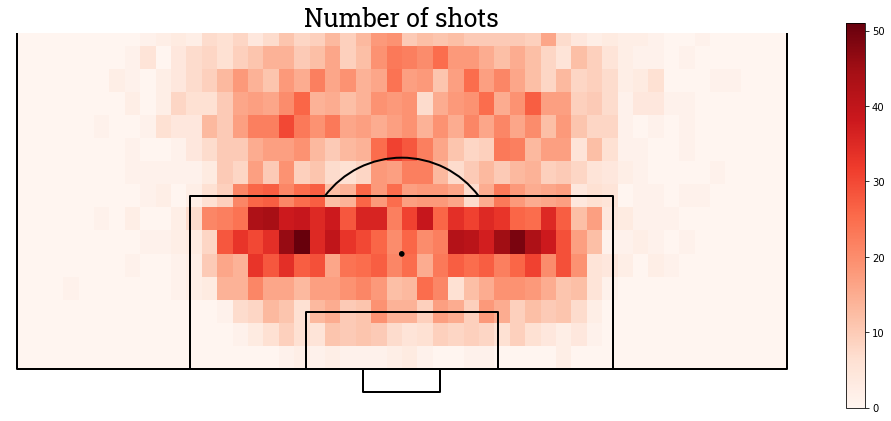

In [94]:
#Plot the number of shots from different points
pitch = VerticalPitch(pitch_type='statsbomb', half=False, goal_type= 'box', line_color='black') 
fig, ax = pitch.draw(figsize=(14, 6))
pos=ax.imshow(H_Shot[0], extent=[0,80,120, 0], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Number of shots', fontsize= 25, fontproperties=robotto_bold.prop)
plt.xlim((-1,81))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
#fig.savefig('Output/NumberOfShots.pdf', dpi=None, bbox_inches="tight")  

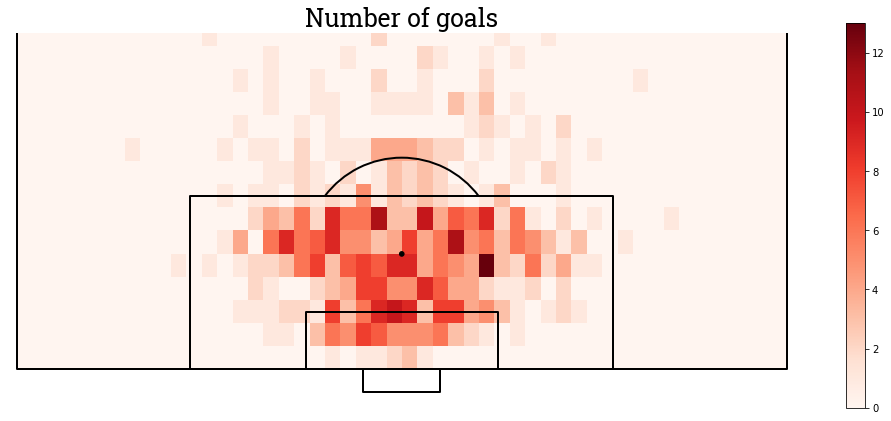

In [97]:
#Plot the number of shots from different points
pitch = VerticalPitch(pitch_type='statsbomb', half=False, goal_type= 'box', line_color='black')
fig, ax = pitch.draw(figsize=(14, 6)) 
pos=ax.imshow(H_Goal[0], extent=[0,80,120,0], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Number of goals', fontsize= 25, fontproperties=robotto_bold.prop)
plt.xlim((-1,81))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

C:\Users\34626\AppData\Local\Temp\ipykernel_12324\3822127920.py:3: RuntimeWarning: invalid value encountered in true_divide
  pos=ax.imshow(H_Goal[0]/H_Shot[0], extent=[0,80,120,0], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.5)


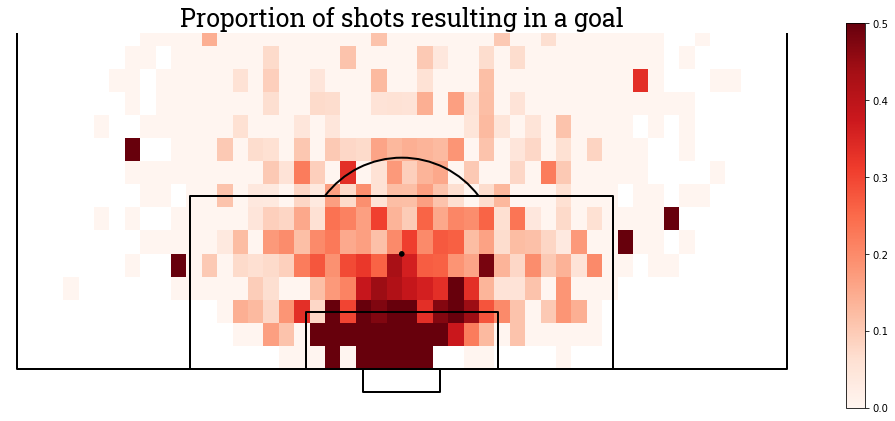

In [99]:
pitch = VerticalPitch(pitch_type='statsbomb', half=False, goal_type= 'box', line_color='black')
fig, ax = pitch.draw(figsize=(14, 6)) 
pos=ax.imshow(H_Goal[0]/H_Shot[0], extent=[0,80,120,0], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.5)
fig.colorbar(pos, ax=ax)
ax.set_title('Proportion of shots resulting in a goal', fontsize= 25, fontproperties=robotto_bold.prop)
plt.xlim((-1,81))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()